# Twitter data collection

In [98]:
#This code is written by Haifeng Niu.
import tweepy
import csv
import time
import os.path


#Variables that contains the user credentials to access Twitter API 
access_token = "933335623804575745-mLCTu3p93Q2aBMwvZjUp9zDhCXRISpk"
access_token_secret = "NNMQf62TUN9hzhSChJtcPI57oyR8QgYbGRHpuLdEzQR61"
consumer_key = "bxYVJ7XTvcoAYjB8xWFRCVcWB"
consumer_secret = "NJiybamOME07wkUlqSYbTcm7IcUuhWocO0L0fHmwz0Aoa8TYVO"

In [99]:
file_exists = os.path.isfile('tweet.csv')

auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [100]:
keywords = " "

In [ ]:
search_results = api.search(q = keywords, count=10000, geocode = "51.50853, -0.12574, 50mi")

def search():
	with open('tweet.csv',mode = 'a+',encoding='utf-8') as f:
		headers = ['id', 'tweet', 'coordinates']
		writer = csv.DictWriter(f, delimiter=',', lineterminator='\n',fieldnames=headers)
		if not file_exists:
			writer.writeheader()
		for status in search_results:
			if status.coordinates == None:
				writer.writerow({'id': status.id, 'tweet': status.text})
			else:
				writer.writerow({'id': status.id, 'tweet': status.text, 'coordinates': status.coordinates['coordinates']})

while True:
	search()
	time.sleep(3600*3)




# Sentiment analysis: AFINN dictionary
https://github.com/fnielsen/afinn

In [95]:
#Yiqiao's code
from __future__ import division
from afinn import Afinn
import numpy as np
import pandas as pd

In [96]:
afinn = Afinn(emoticons = True)
afinn.score('This is utterly excellent!;)')

5.0

In [97]:
df = pd.read_csv('tweet.csv')
df

,id,tweet,coordinates


In [11]:
df.dtypes

id             object
tweet          object
coordinates    object
dtype: object

In [12]:
for text in df.tweet:
    print(text)

@RogerProtzBeer @JonnyGarrett @thornbridge @andreagillies @CityOfAle @zythophiliac Don’t forget Beer and Skittles b… https://t.co/9JCd0akc3I
RT @SparkPenketh: Excellent work in @microbit_edu introductions for year 7 today.Really impressed ! https://t.co/y5vtxk728f
@IiStraff Holla
RT @thisisanfield: "I think this is massive to Japanese kids playing football." 🇯🇵 https://t.co/VeCa9IVKRt
@LivEchonews Bring back old school quiggins on the high st
RT @berniespofforth: The rise of environmentally conscious consumers might imply that packaging growth is in decline, it isnt. This $1 tril…
RT @_fabinhotavares: Back to training. Almost there! 💪🏾 🔴 https://t.co/TtfKCSemvt
RT @joynes85: Personal opinion - if I took my dog to a trainer and he attacked her like this I would knock him out. Professional opinion -…
@VaughanLewis1 @gamray I’ve backed long Bailey at 3.7. Head ruling heart, has to be a great bet given polls and rec… https://t.co/BMuCkHYC9F
Neymar silencing the Yellow Wall next month will 

RT @FrostDragonLiz: And it's live and splashing! 
Web - https://t.co/xaWcMjbuHe
Android - https://t.co/5Z9gc0WRTm
iOS - No iOS version as i…
@jackvandermeers @MirrorFighting @JoshMann177 Well played 😂😂😂😂
Who's watching Good Omens?
RT @LFC: Good to see this man back 🙌

💪 @_fabinhotavares 💪 https://t.co/grSyIY2ovj
RT @WiganMuseum: It's nearly Chinese New Year &amp; we can't wait! ❤ Join us for a day packed full of FREE family fun with lion dancers, martia…
RT @MoSalah: ⚽️⚽️ https://t.co/Un7yRn6Dzv
@FHChat https://t.co/c6uyEPtNHl
RT @karenstonehous3: Please donate, to help deprived homeless children, by giving them a chance in this world,not just in the UK but all ov…
RT @MrsThomasMLP: It’s lovely to see so many children unwrap their talents @MabLanePri 💝 #onlythebest #everychildmatters https://t.co/ryRsR…
@FemzyDaRaw IFB
@Leeavvy Fuck me he just walks off wi no fucks given
@rioferdy5 You can also miss a piss test
@MENnewsdesk Hope it happens to them in prison
As it's Appreciate a Dragon 

Switched to Dead by Daylight with the squad (@UniqueDreaam, @anabphoto and Haag!) https://t.co/6kobmWJhAG
@JHenderson Yes hendo
Troare has been poor ngl guess he only turns up against the small clubs  eh
RT @robcarter__: The Lineker Derby
RT @johngibbonsblog: Fucking hell imagine Ibiza away
RT @FrostDragonLiz: And it's live and splashing! 
Web - https://t.co/xaWcMjbuHe
Android - https://t.co/5Z9gc0WRTm
iOS - No iOS version as i…
@jackvandermeers @MirrorFighting @JoshMann177 Well played 😂😂😂😂
Who's watching Good Omens?
RT @LFC: Good to see this man back 🙌

💪 @_fabinhotavares 💪 https://t.co/grSyIY2ovj
RT @WiganMuseum: It's nearly Chinese New Year &amp; we can't wait! ❤ Join us for a day packed full of FREE family fun with lion dancers, martia…
RT @MoSalah: ⚽️⚽️ https://t.co/Un7yRn6Dzv
@FHChat https://t.co/c6uyEPtNHl
RT @karenstonehous3: Please donate, to help deprived homeless children, by giving them a chance in this world,not just in the UK but all ov…
RT @MrsThomasMLP: It’s lovely to s

In [8]:
#anonymorise user name
new_twitter = []
for text in df.tweet:
    word_list = text.split(" ")
    for i in range(len(word_list)):
        if word_list[i].startswith('@'):
            word_list[i] = 'anonymous user'
    text = " ".join(word_list)
    text = ' ' + text + ' '
    new_twitter.append(text)
print(len(new_twitter))
#print(new_twitter)

5313


In [9]:
df['anonymous_tweet'] = new_twitter

In [10]:
df

,id,tweet,coordinates,anonymous_tweet
0,1217552319212138497,@RogerProtzBeer @JonnyGarrett @thornbridge @an...,NaN,anonymous user anonymous user anonymous user ...
1,1217552316561264641,RT @SparkPenketh: Excellent work in @microbit_...,NaN,RT anonymous user Excellent work in anonymous...
2,1217552315907039232,@IiStraff Holla,NaN,anonymous user Holla
3,1217552315252715520,"RT @thisisanfield: ""I think this is massive to...",NaN,"RT anonymous user ""I think this is massive to..."
4,1217552315042947076,@LivEchonews Bring back old school quiggins on...,NaN,anonymous user Bring back old school quiggins...
...,...,...,...,...
5308,1217754218041434112,"@greenbenali Fuel to the fire, etc",NaN,"anonymous user Fuel to the fire, etc"
5309,1217754213045932032,@NiallFarrington @becca_nielsen SADOS,NaN,anonymous user anonymous user SADOS
5310,1217754212387311617,"RT @LFC: Have a great day, @takumina0116 🥳🙌 ht...",NaN,"RT anonymous user Have a great day, anonymous..."
5311,1217754210701381632,RT @StanleyHouseLFC: Bobby Firmino getting Bap...,NaN,RT anonymous user Bobby Firmino getting Bapti...


In [11]:
df.astype({'anonymous_tweet': 'string'}).dtypes

id                 object
tweet              object
coordinates        object
anonymous_tweet    string
dtype: object

In [12]:
# Sentiment analysis with AFINN
afinn = Afinn(emoticons=True)
afinn_scores = [afinn.score(tweet) for tweet in df.tweet]
df['sentiment'] = afinn_scores
df[['sentiment', 'anonymous_tweet']].head(10)

,sentiment,anonymous_tweet
0,-1.0,anonymous user anonymous user anonymous user ...
1,6.0,RT anonymous user Excellent work in anonymous...
2,0.0,anonymous user Holla
3,0.0,"RT anonymous user ""I think this is massive to..."
4,0.0,anonymous user Bring back old school quiggins...
5,3.0,RT anonymous user The rise of environmentally...
6,0.0,RT anonymous user Back to training. Almost th...
7,1.0,RT anonymous user Personal opinion - if I too...
8,4.0,anonymous user anonymous user I’ve backed lon...
9,-1.0,Neymar silencing the Yellow Wall next month w...


In [13]:
df

,id,tweet,coordinates,anonymous_tweet,sentiment
0,1217552319212138497,@RogerProtzBeer @JonnyGarrett @thornbridge @an...,NaN,anonymous user anonymous user anonymous user ...,-1.0
1,1217552316561264641,RT @SparkPenketh: Excellent work in @microbit_...,NaN,RT anonymous user Excellent work in anonymous...,6.0
2,1217552315907039232,@IiStraff Holla,NaN,anonymous user Holla,0.0
3,1217552315252715520,"RT @thisisanfield: ""I think this is massive to...",NaN,"RT anonymous user ""I think this is massive to...",0.0
4,1217552315042947076,@LivEchonews Bring back old school quiggins on...,NaN,anonymous user Bring back old school quiggins...,0.0
...,...,...,...,...,...
5308,1217754218041434112,"@greenbenali Fuel to the fire, etc",NaN,"anonymous user Fuel to the fire, etc",-2.0
5309,1217754213045932032,@NiallFarrington @becca_nielsen SADOS,NaN,anonymous user anonymous user SADOS,0.0
5310,1217754212387311617,"RT @LFC: Have a great day, @takumina0116 🥳🙌 ht...",NaN,"RT anonymous user Have a great day, anonymous...",3.0
5311,1217754210701381632,RT @StanleyHouseLFC: Bobby Firmino getting Bap...,NaN,RT anonymous user Bobby Firmino getting Bapti...,1.0


In [14]:
#statistic of sentiment
print (df.describe())

         sentiment
count  5313.000000
mean      1.036891
std       3.471560
min      -8.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      15.000000


In [15]:
#save to a new csv
df.to_csv('tweet_scores.csv')

# Keyword analysis - wordcloud

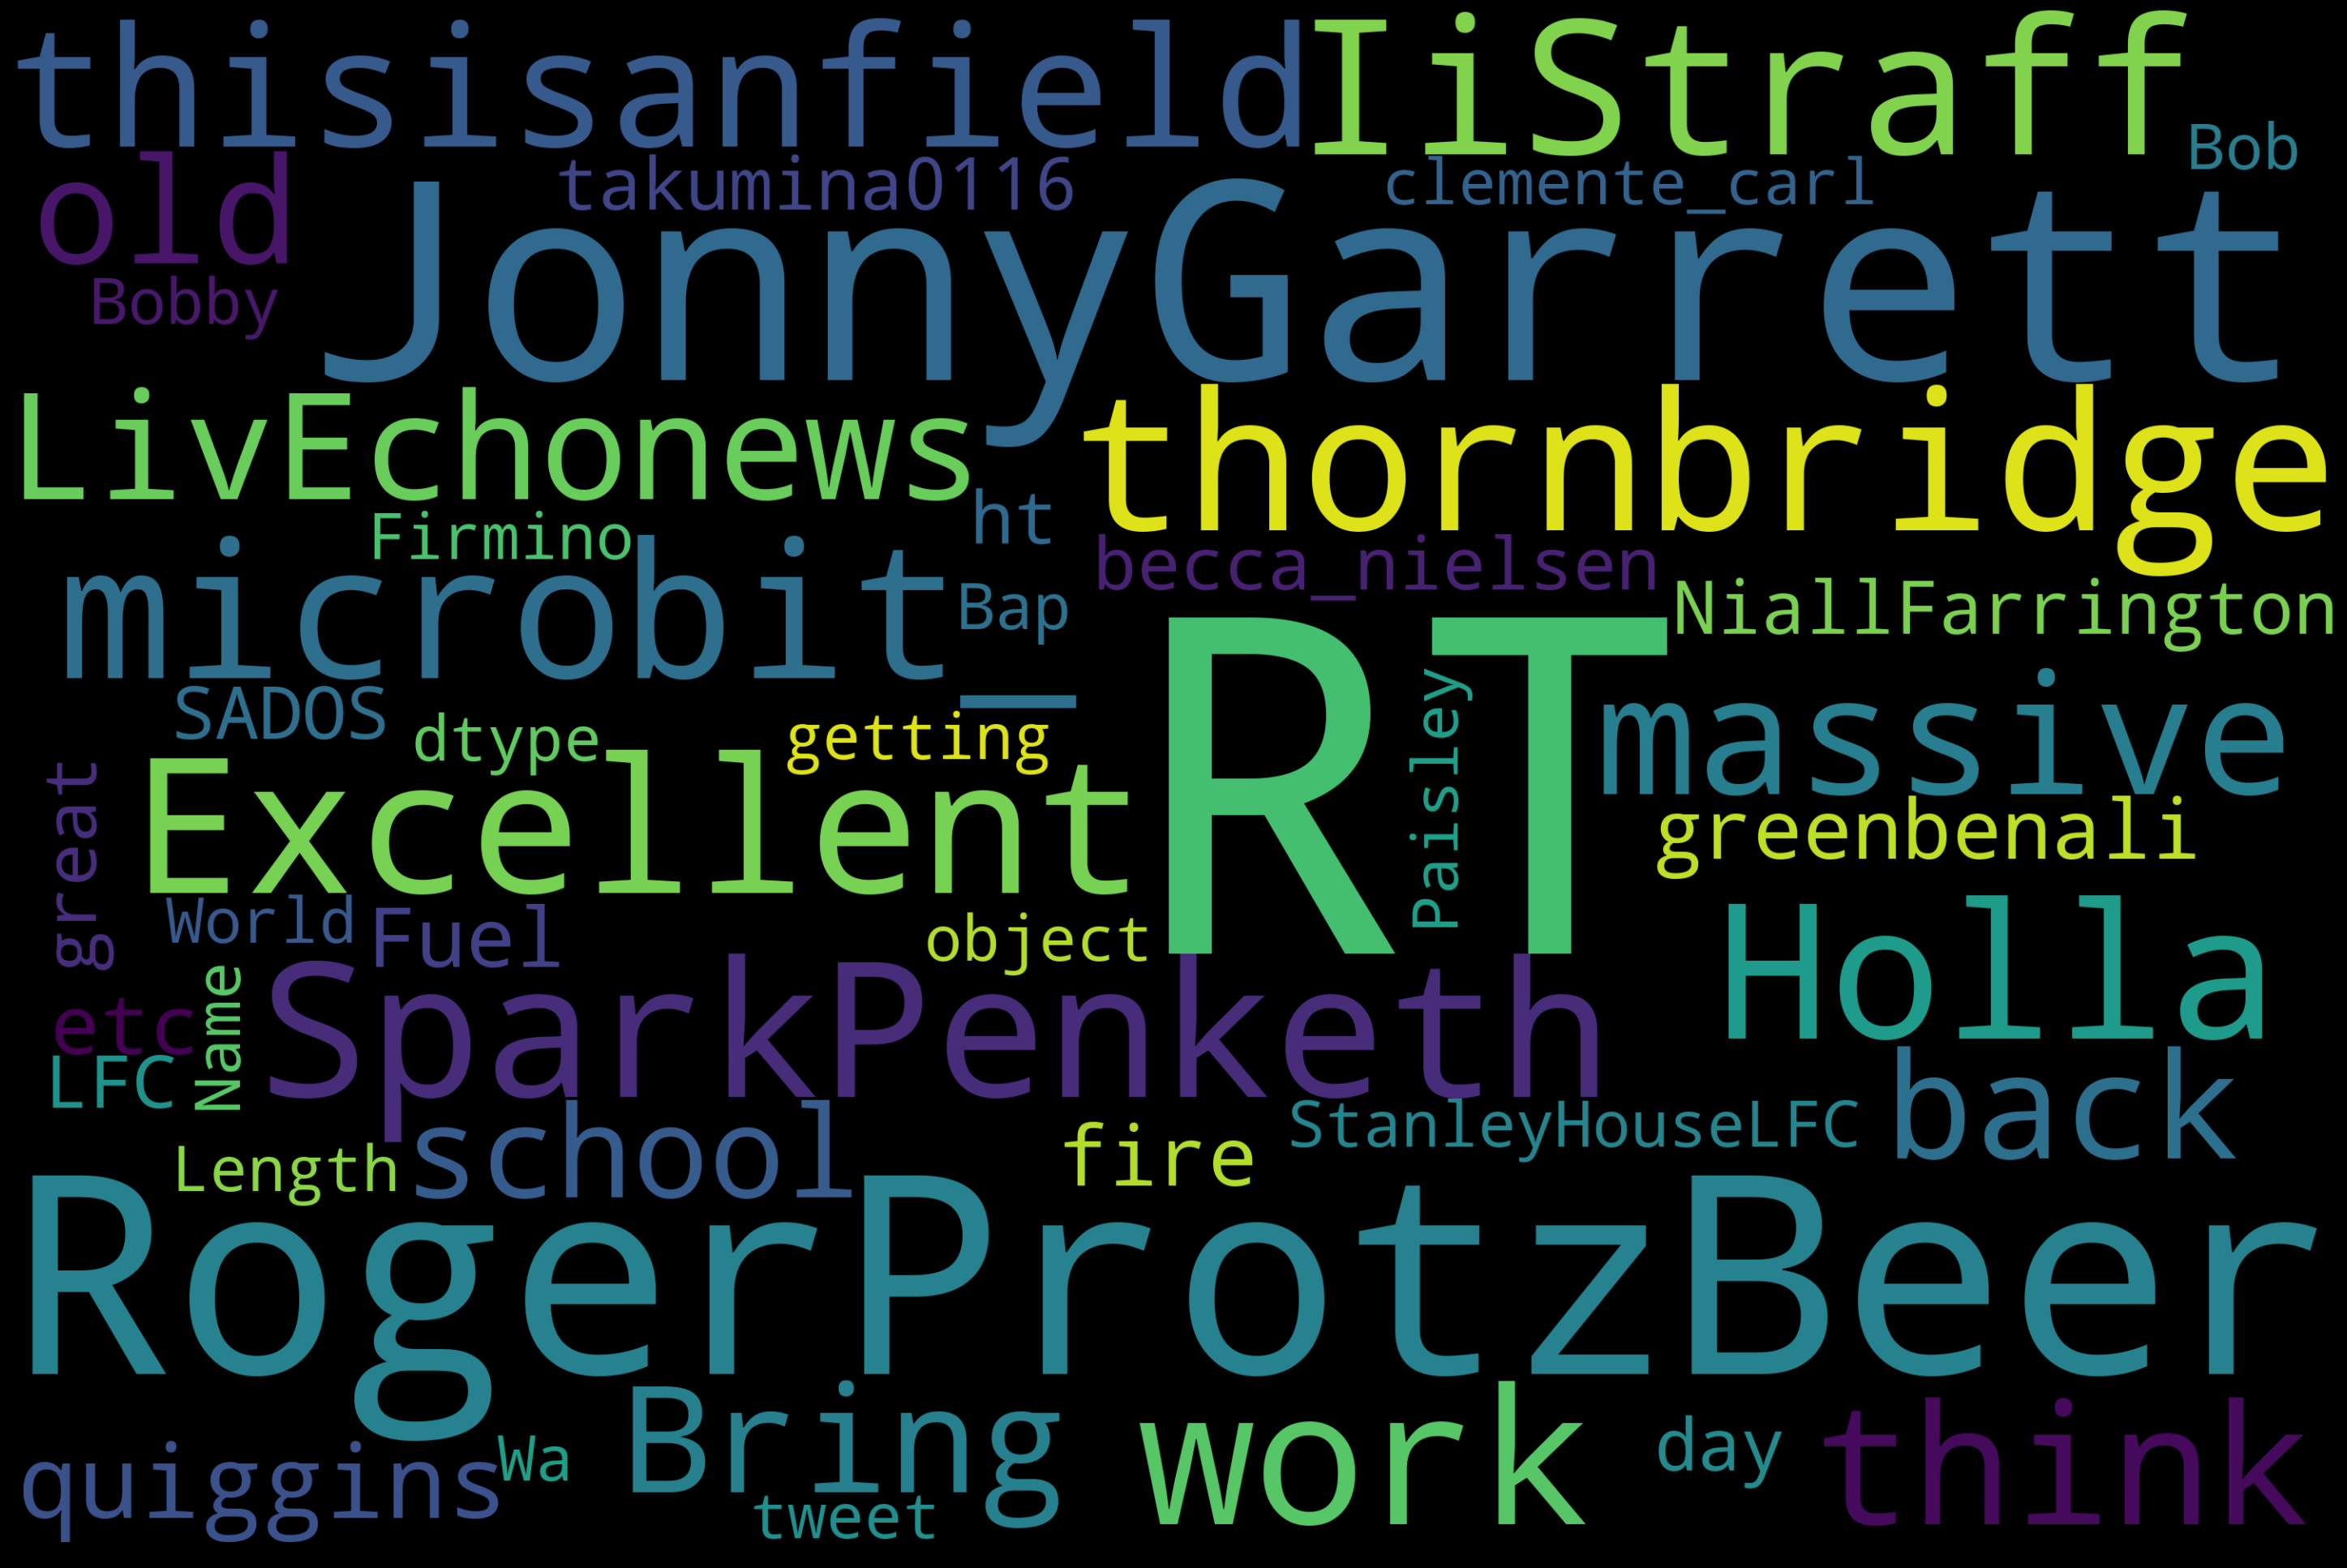

In [52]:
#generate a wordcloud for the tweets
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.tweet
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
#plt.savefig("wordcloud.png")

# Keyword extractions
## Clean tweets - for further keyword extractions
https://github.com/sillsphelyx/Twitter_text_cleaning

In [28]:
# importing the necessary dependencies
from collections import Counter
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import wordnet, stopwords
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.tokenize import WordPunctTokenizer
import re
#import seaborn as sns
#import pandas as pd
import nltk
import warnings
nltk.download('all')
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /Users/y

[nltk_data]    |   Unzipping corpora/sentence_polarity.zip.
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/shakespeare.zip.
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Package stopwords is already up-to-date!
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /Users/yiqiao/nltk_data...
[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_da

In [30]:
# At this point we will be intereseted in removing all the unuseful characters such as "@,#" and hyper links "https....". This will be achieved by the subsequentely defined functions.
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'       # Removing @text situations
pat2 = r'https?://[A-Za-z0-9./]+'  # Removing hyperlinks
combined_pat = r'|'.join((pat1, pat2))  

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml') # converting possibly unconverted html to text
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    letters_only = re.sub("[^a-zA-Z]", " ", stripped) # Getting read of non text characters
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # We tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [85]:
# Looping over every tweet in the data set and applying the tweet_cleaner function it.
clean_tweet_texts = []
for tweet in df.tweet:
    clean_tweet_texts.append(tweet_cleaner(tweet))
clean_tweet_texts

['don t forget beer and skittles b',
 'rt excellent work in edu introductions for year today really impressed',
 'holla',
 'rt i think this is massive to japanese kids playing football',
 'bring back old school quiggins on the high st',
 'rt the rise of environmentally conscious consumers might imply that packaging growth is in decline it isnt this tril',
 'rt fabinhotavares back to training almost there',
 'rt personal opinion if i took my dog to a trainer and he attacked her like this i would knock him out professional opinion',
 'i ve backed long bailey at head ruling heart has to be a great bet given polls and rec',
 'neymar silencing the yellow wall next month will be some sight',
 'rt does your daughter fancy trying rugbyleague and in school years bring her down or dm for further info to',
 'trump impeachment house sends historic case to senate',
 'rt good to see this man back fabinhotavares',
 'much better than kenny x',
 'pcwillis',
 'strickley forecast partly cloudy and cooler

In [34]:
#creating a new DataFrame for the filtered text
clean_df = pd.DataFrame(df['id'],columns=['id'])
clean_df['text'] = clean_tweet_texts
clean_df

In [69]:
# Removing non-english text
#  This function takes in as input a sentence and returns only english words 
def filter_for_english(sent):
    return (" ".join(w for w in nltk.wordpunct_tokenize(sent) \
             if len(wordnet.synsets(w)) > 3))

In [70]:
#looping over all tweets to return contained english words
checked_for_english = [filter_for_english(sent) for sent in clean_df.text]
# adding a column with tweets that are in English
clean_df['English_text'] = checked_for_english
# adding count columns for number of words per tweet for both clean_text and English only text 
clean_df['Clean_text_len'] = [len(t.split()) for t in clean_df.text]
clean_df['English_word_count'] = [len(t.split()) for t in clean_df.English_text] # Useful for filtering dataframe on english text
clean_df

,id,text,English_text,Clean_text_len,English_word_count
0,1217552319212138497,don t forget beer and skittles b,don t forget b,7,4
1,1217552316561264641,rt excellent work in edu introductions for yea...,work in introductions year today really impressed,11,7
2,1217552315907039232,holla,,1,0
3,1217552315252715520,rt i think this is massive to japanese kids pl...,i think is massive kids playing,11,6
4,1217552315042947076,bring back old school quiggins on the high st,bring back old school on high,9,6
...,...,...,...,...,...
5308,1217754218041434112,fuel to the fire etc,fuel fire,5,2
5309,1217754213045932032,nielsen sados,,2,0
5310,1217754212387311617,rt have a great day,have a great day,5,4
5311,1217754210701381632,rt bobby firmino getting baptised in his pool ...,getting in pool sheds tears joy is maddest thi...,23,10


In [71]:
#Filter dataframe by choosing rows that have atleast one english word
english_df = clean_df[clean_df['English_word_count'] > 0][['id', 'English_text']]
english_df.head()
#Saving the selected rows of english tweets to a csv file for further analysis
#english_df.to_csv('Cleaned_English_tweets.csv', index=False)

,id,English_text
0,1217552319212138497,don t forget b
1,1217552316561264641,work in introductions year today really impressed
3,1217552315252715520,i think is massive kids playing
4,1217552315042947076,bring back old school on high
5,1217552311960117249,rise imply packaging growth is in decline


In [72]:
english_df['Word_count'] = [len(t.split()) for t in english_df.English_text]

## Exploring the English text dataframe

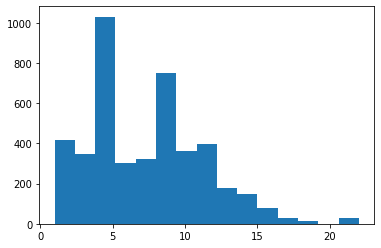

In [73]:
# Distribution of word length in the tweets
# Most tweets seem to have been short (<10) words
plt.hist(english_df.Word_count, bins = 15)
plt.show()

In [74]:
## Inspecting the most common words used in all the observed english tweets
# Breaking into individual words every tweet
def my_tokenizer(text):
    return text.split() if text != None else []

In [75]:
# Breaking all english tweets into individual words and returning a list of these words
tokens = english_df.English_text.map(my_tokenizer).sum()

In [76]:
# most common words in all tweets (stop words included)
counter_wsw = Counter(tokens)
counter_wsw.most_common(20)

[('a', 1717),
 ('i', 1277),
 ('in', 754),
 ('on', 529),
 ('s', 518),
 ('have', 473),
 ('is', 449),
 ('t', 442),
 ('as', 373),
 ('day', 351),
 ('are', 330),
 ('be', 310),
 ('just', 290),
 ('m', 287),
 ('will', 279),
 ('was', 264),
 ('can', 261),
 ('back', 252),
 ('has', 231),
 ('win', 228)]

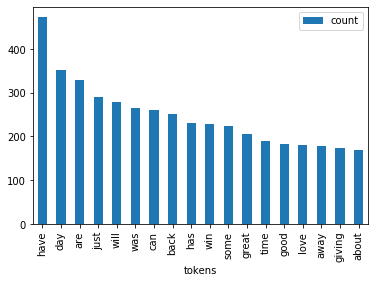

In [77]:
# creating a data frame for the most common words with stop words in the tweets for plotting
# >2 to exclude single and doulble lettered words that aren't included among stop words 
word_freq_wsw = pd.DataFrame.from_records([x for x in counter_wsw.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])
# plotting word frequencies (stop words included)
word_freq_wsw.plot(kind = 'bar', x = 'tokens')

In [78]:
# removal of stop words and rechecking the most frequent words
def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOP_WORDS]
counter = Counter(remove_stopwords(tokens))

In [79]:
# creating a data frame for the most common words without stop words in the tweets for plotting
word_freq = pd.DataFrame.from_records([x for x in counter.most_common(30) if len(x[0])> 2], columns = ['tokens', 'count'])

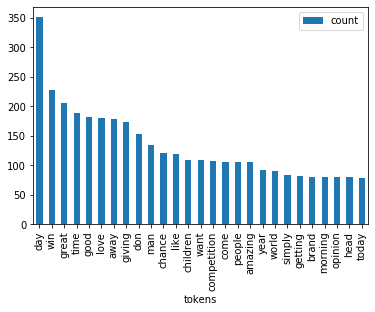

In [80]:
# frequency distribution of the top 19 most used words in the twitter data
word_freq.plot(kind = 'bar', x = 'tokens')

In [81]:
# tokens without stop words and single and double lettered words
tokens_nsw = [x for x in remove_stopwords(tokens) if len(x) > 2]

In [82]:
bigrams = nltk.bigrams(tokens_nsw)
bi_count = Counter(bigrams)
bi_count

Counter({('don', 'forget'): 13,
         ('forget', 'work'): 13,
         ('work', 'introductions'): 13,
         ('introductions', 'year'): 13,
         ('year', 'today'): 13,
         ('today', 'impressed'): 13,
         ('impressed', 'think'): 13,
         ('think', 'massive'): 13,
         ('massive', 'kids'): 13,
         ('kids', 'playing'): 13,
         ('playing', 'bring'): 13,
         ('bring', 'old'): 13,
         ('old', 'school'): 13,
         ('school', 'high'): 13,
         ('high', 'rise'): 13,
         ('rise', 'imply'): 13,
         ('imply', 'packaging'): 13,
         ('packaging', 'growth'): 13,
         ('growth', 'decline'): 13,
         ('decline', 'training'): 13,
         ('training', 'personal'): 13,
         ('personal', 'opinion'): 40,
         ('opinion', 'took'): 40,
         ('took', 'dog'): 40,
         ('dog', 'attacked'): 40,
         ('attacked', 'like'): 40,
         ('like', 'knock'): 40,
         ('knock', 'professional'): 40,
         ('profession

In [83]:
#creating a data frame for the most common words without stop words in the tweets for plotting
bigram_freq = pd.DataFrame.from_records(bi_count.most_common(20), columns = ['tokens', 'count'])
bigram_freq.head()

,tokens,count
0,"(great, day)",148
1,"(win, love)",81
2,"(love, brand)",81
3,"(brand, giving)",81
4,"(giving, away)",81


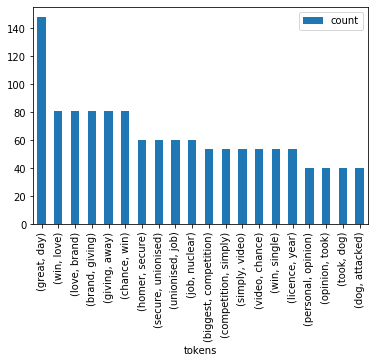

In [84]:
bigram_freq.plot(kind = 'bar', x = 'tokens')